PyQC is a concise and Pythonic toolbox for constructing and evaluating quantum circuits.  It is built on top of the powerful [QuTiP](http://qutip.org/) (Quantum Toolbox in Python) framework which provides most of the numerical heavy lifting, but adds a high-level user interface that strives to mimic how we write equations with quantum states and operators as closely as is possible in Python.  It also provides results rendered in LaTeX, as well as rendering of quantum circuit diagrams.

# PyQC basics

This section provides a crash course on the core features of PyQC.  Later sections of this documentation go into further detail on how to use each of the objects described here.

The easiest way to start using PyQC, once it is installed, is to import the entire `pyqc` module into your local namespace:

In [1]:
from pyqc import *

One of the most basic objects in PyQC, representing an $ n $-qubit state is the `Ket` (as in a ket vector).  To create a single-qubit state representing the value 0, just instantiate a `Ket` like so:

In [2]:
Ket(0)

|0>

We can also create superposition states using the addition operator `+`.  By default all superpositions are normalized automatically:

In [3]:
Ket(0) + Ket(1)

sqrt(1/2)(|0> + |1>)

Multiple qubit states can be created in several ways that will be discussed in full in the section on state vectors.  The simplest, however, is to instantiate a `Ket` with a sequence of bits.  For example, we can create a 3-qubit state representing the value 5 like so:

In [4]:
Ket(1, 0, 1)

|1, 0, 1>

Operators on $n$-qubit states can created by instantiating an `Operator` object with the matrix elements for that operator:

In [5]:
Operator([[1, 0],
          [0, 0]])

O_0 = [[1. 0.]
       [0. 0.]]

In the above example the "(0)" subscript is used to indicate that this operator is given a default name (the next operator would have a default name of $ \hat{O}_{(1)} $ and so on).  Operators can also be given custom names and LaTeX representations for use in equation rendering.  The previous example might be rewritten to emphasize that this is a projection operator:

In [6]:
P_0 = Operator([[1, 0],
                [0, 0]],
               name='P_0', latex_name='P_0')
P_0

P_0 = [[1. 0.]
       [0. 0.]]

Operators can act on a state using the `|` syntax in Python (this is different from other linear algebra systems you might be familiar with that use `*` to perform matrix multiplication).  The output, as one would expect, is a new state:

In [7]:
psi = Ket(0) + Ket(1)
P_0|psi

|0>

PyQC includes operators for most common quantum gates out of the box.  For example the Hadamard gate:

In [8]:
H

H = [[ 0.70710678  0.70710678]
     [ 0.70710678 -0.70710678]]

The CNOT gate:

In [9]:
CNOT

CNOT = [[1. 0. 0. 0.]
        [0. 1. 0. 0.]
        [0. 0. 0. 1.]
        [0. 0. 1. 0.]]

The Toffoli gate:

In [10]:
Toffoli

Toffoli = [[1. 0. 0. 0. 0. 0. 0. 0.]
           [0. 1. 0. 0. 0. 0. 0. 0.]
           [0. 0. 1. 0. 0. 0. 0. 0.]
           [0. 0. 0. 1. 0. 0. 0. 0.]
           [0. 0. 0. 0. 1. 0. 0. 0.]
           [0. 0. 0. 0. 0. 1. 0. 0.]
           [0. 0. 0. 0. 0. 0. 0. 1.]
           [0. 0. 0. 0. 0. 0. 1. 0.]]

And the Pauli matrices.  For example:

In [11]:
Z

Z = [[ 1.  0.]
     [ 0. -1.]]

Operators can be combined using the `|` syntax, just as we used to apply an operator to a state.  For example:

In [12]:
H|Z|H

H | Z | H = [[0. 1.]
             [1. 0.]]

We can also use tensor products of operators to create operators on multi-qubit states.  The `*` symbol is reserved for tensor products between matrices and/or states.  For example:

In [13]:
O = (X * X)
O

X * X = [[0. 0. 0. 1.]
         [0. 0. 1. 0.]
         [0. 1. 0. 0.]
         [1. 0. 0. 0.]]

In [14]:
O|Ket(0, 0)

|1, 1>

Operator products and tensor products can be combined arbitrarily to build up entire circuits:

In [15]:
C = (H * H)|CNOT|(H * H)
C

(H * H) | CNOT | (H * H) = \
    [[1. 0. 0. 0.]
     [0. 0. 0. 1.]
     [0. 0. 1. 0.]
     [0. 1. 0. 0.]]

In [16]:
C|Ket(1, 1)

|0, 1>

We can also define `Circuit` objects which are just a special class of operator built up from a list of circuit instructions, sort of like a simple assembly language.  The `Circuit` is initialized with a list of tuples, the first element of which is an operation represented by the gate object itself, such as `H`, and the second is either an integer corresponding to a qubit to apply the gate to, or a tuple for multi-qubit gates.  In this circuit description language the above example would be written:

In [17]:
C2 = Circuit([
    (H, 0),
    (H, 1),
    (CNOT, (0, 1)),
    (H, 0),
    (H, 1)
])

This is equivalent to the gate defined in the previous example:

In [18]:
C == C2

True

This `Circuit` object is also an `Operator` equivalent to the one we built earlier using mathematical expressions, and can operate on a state in the same way:

In [19]:
C|Ket(1, 1)

|0, 1>

Though one other advantage of `Circuit` objects is that by default they are rendered as circuit diagrams (this feature currently requires a full-featured LaTeX distribution [TexLive](https://www.tug.org/texlive/)):

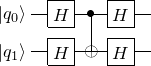

In [20]:
C2

There is a way also write circuits using an interface that lays them out similar to a circuit diagram, where each row represents the operations performed on each qubit in the circuit.  Multi-qubit operators have labels representing each of their inputs.  For example `CNOT.target` and `CNOT.control` (or we can use `CNOT.t` and `CNOT.c` for short).  This is mostly useful for toy examples:

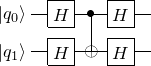

In [21]:
Circuit.from_wires(
    [H, CNOT.c, H],
    [H, CNOT.t, H]
)